# PLBenchmark Example Notebook

In [1]:
from plbenchmark import targets
from IPython.core.display import HTML

_ColormakerRegistry()

{'mcl1_sample': {'name': 'mcl1_sample', 'date': datetime.date(2020, 8, 26), 'dir': '2020-08-26_mcl1_sample'}}


# Get the whole set of targets in the dataset

In [2]:
# it is initialized from the `plbenchmark/sample_data/targets.yml` file
target_set = targets.TargetSet()
# to see which targets are available, one can get a list of names
target_set.get_names()

['mcl1_sample']

The `TargetSet` is a `Dict`, but can be converted to a `pandas.DataFrame` or a `html` string via `TargetSet.get_dataframe(columns=None)` or `TargetSet.get_html(columns=None)`. The default `None` for `columns` means that all columns are printed. One can also define a subset of columns as a `list`: 

In [3]:
HTML(target_set.get_html(columns=['name', 'fullname', 'pdb', 'references', 'numLigands', 'minDG', 'maxDG', 'associated_sets']))

,name,fullname,pdb,references,numLigands,minDG,maxDG,associated_sets
0,mcl1_sample,Induced myeloid leukemia cell differentiation protein Mcl-1,4HW3,"{'measurement': None, 'calculation': ['10.1021/ja512751q', '10.1021/acs.jcim.9b00105']}",15,-9.0 kilocalorie / mole,-6.1 kilocalorie / mole,[Schrodinger JACS]


A `target` can be accessed with its name in two ways

In [4]:
mcl1 = target_set['mcl1_sample']
mcl1_2 = target_set.get_target('mcl1_sample')

# The `Target` class
contains all the available information about one target of plbenchmark. It also has two member variables, `_ligand_set` and `_edge_set`, which contain the information about the available ligand and edges of the respective target. 
A `Target` can either be accessed from the `TargetSet` (see cell before) or initialized using its name via

In [5]:
mcl1 = targets.Target('mcl1_sample')
# The data in the column is stored in a pandas.Series and can be accessed via
mcl1.get_dataframe(columns=None)

id                                                                99
date                                                      2020-08-21
name                                                     mcl1_sample
fullname           Induced myeloid leukemia cell differentiation ...
netcharge                                                         xx
pdb                                                             4HW3
ligands            [lig_23, lig_26, lig_27, lig_28, lig_29, lig_3...
references         {'measurement': None, 'calculation': ['10.1021...
comments            hydrophobic interactions contributing to binding
associated_sets                                   [Schrodinger JACS]
numLigands                                                        15
maxDG                                        -6.1 kilocalorie / mole
minDG                                        -9.0 kilocalorie / mole
MAD(DG)                                       0.8 kilocalorie / mole
calculation        REP1http://dx.d

Access to the `EdgeSet` and `LigandSet` in different formats is achieved by


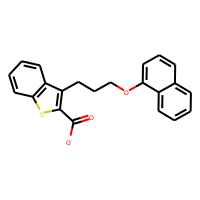
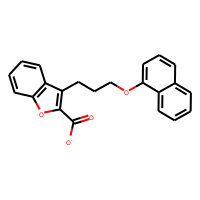
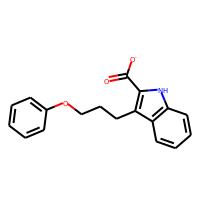
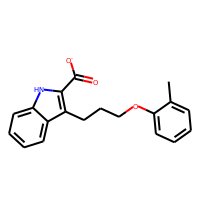
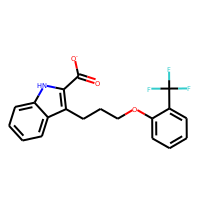
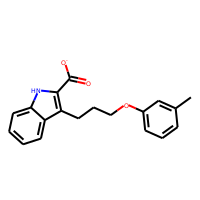
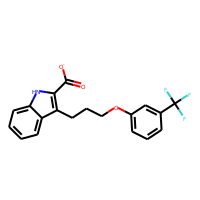
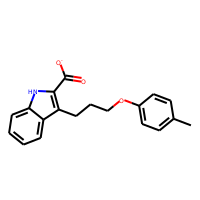
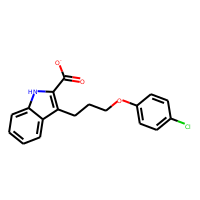
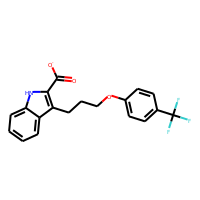
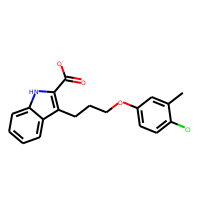
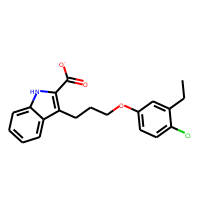
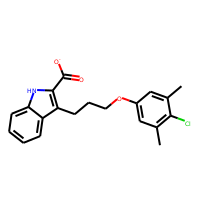
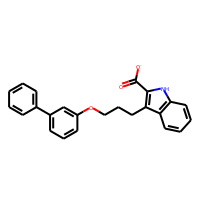
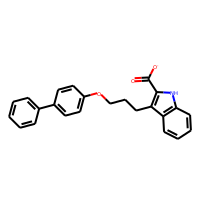

In [6]:
mcl1_ligands = mcl1.get_ligand_set()
mcl1_ligands_df = mcl1.get_ligand_set_dataframe()
HTML(mcl1.get_ligand_set_html(columns = ['name', 'ROMol', 'measurement', 'DerivedMeasurement']))

,0,1,Mol1,Mol2,Smiles1,Smiles2,exp. DeltaG [kcal/mol],exp. Error [kcal/mol]
0,30,27,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])[H])[H])[H])[H])[H] dtype: object,[H]c1c(c(c(c(c1[H])[H])OC([H])([H])C([H])([H])C([H])([H])C2=C(N(c3c2c(c(c(c3[H])[H])[H])[H])[H])C(=O)[O-])[H])[H] dtype: object,1.73 kilocalorie / mole,0.22 kilocalorie / mole
1,33,27,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])[H])Cl)[H])[H])[H])[H] dtype: object,[H]c1c(c(c(c(c1[H])[H])OC([H])([H])C([H])([H])C([H])([H])C2=C(N(c3c2c(c(c(c3[H])[H])[H])[H])[H])C(=O)[O-])[H])[H] dtype: object,0.76 kilocalorie / mole,0.22 kilocalorie / mole
2,39,32,dtype: object,dtype: object,[H]c1c(c(c(c(c1[H])[H])c2c(c(c(c(c2[H])[H])OC([H])([H])C([H])([H])C([H])([H])C3=C(N(c4c3c(c(c(c4[H])[H])[H])[H])[H])C(=O)[O-])[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])[H])C([H])([H])[H])[H])[H])[H])[H] dtype: object,0.45 kilocalorie / mole,0.13 kilocalorie / mole
3,35,37,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)C([H])([H])[H])[H])[H])[H] dtype: object,-0.14 kilocalorie / mole,0.37 kilocalorie / mole
4,28,35,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3C([H])([H])[H])[H])[H])[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,-2.19 kilocalorie / mole,0.22 kilocalorie / mole
5,35,33,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])[H])Cl)[H])[H])[H])[H] dtype: object,1.93 kilocalorie / mole,0.28 kilocalorie / mole
6,31,35,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C(F)(F)F)[H])[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,-0.89 kilocalorie / mole,0.22 kilocalorie / mole

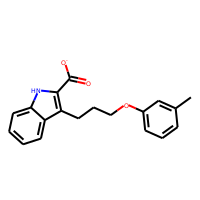
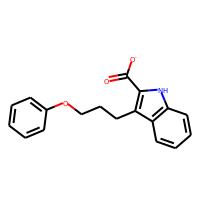
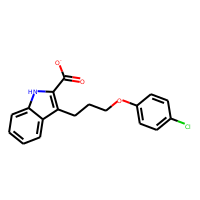
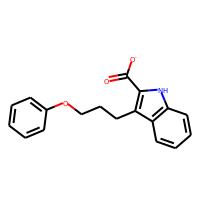
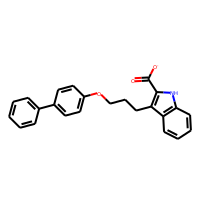
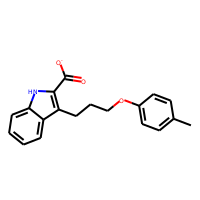
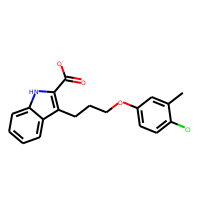
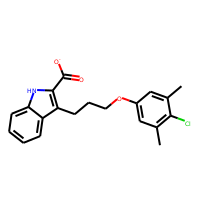
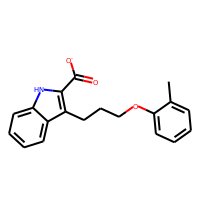
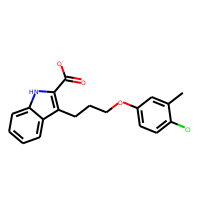
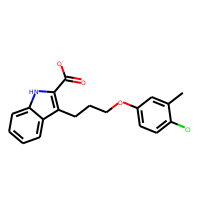
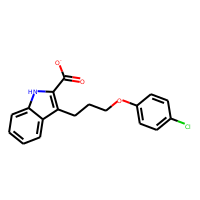
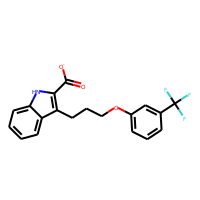
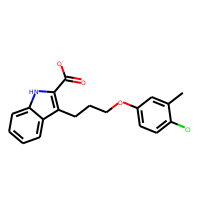

In [7]:
mcl1_edges = mcl1.get_edge_set()
mcl1_edges_df = mcl1.get_edge_set_dataframe()
HTML(mcl1.get_edge_set_html())

Finally, the set out of ligands and edges can be visualized in a graph:

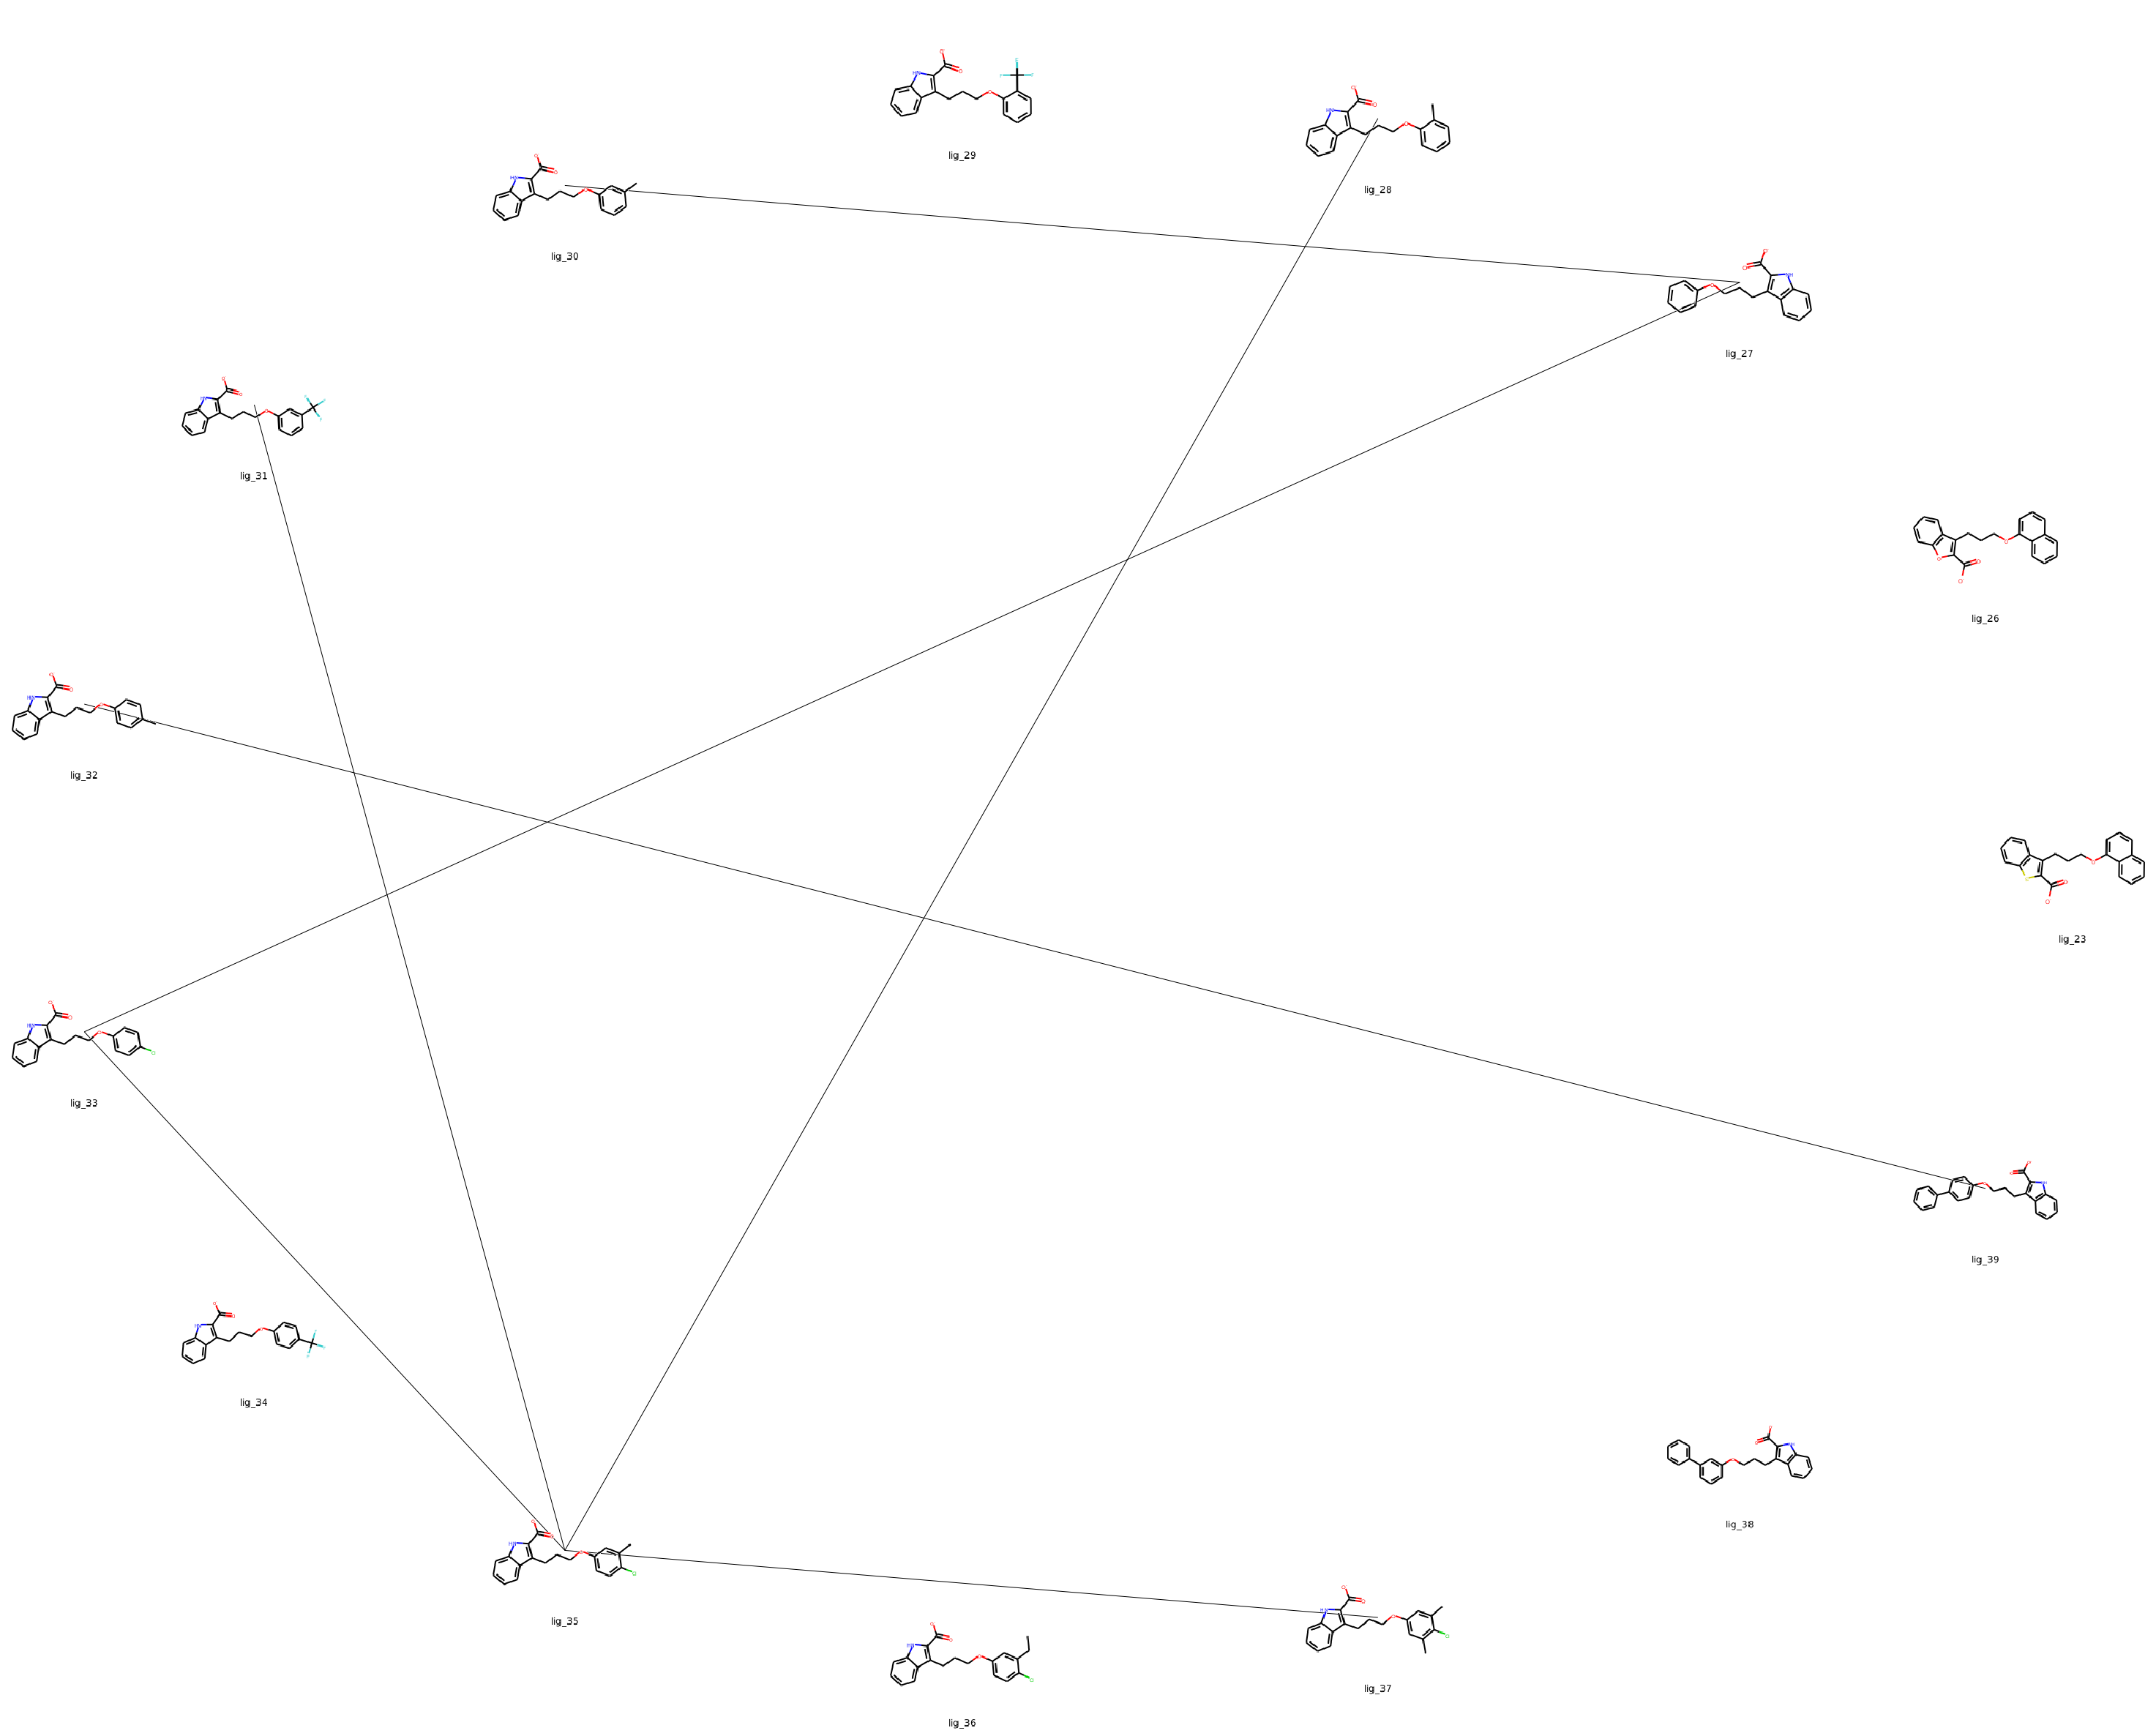

In [8]:
graph = mcl1.get_graph()

# The `LigandSet` and `Ligand` class
The `LigandSet` consists of a `Dict` of `Ligand`s which are availabe for one target. It is accessible via `Target.get_ligand_set()`, but can also be initialized directly.

In [9]:
from plbenchmark import ligands


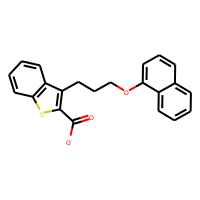
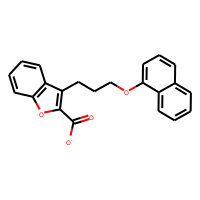
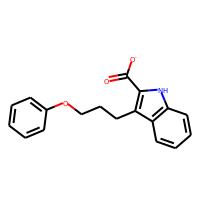
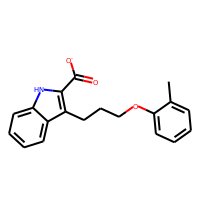
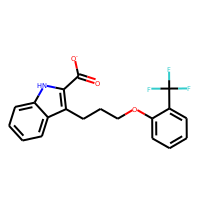
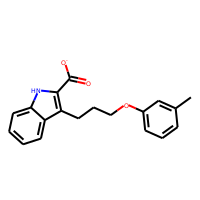
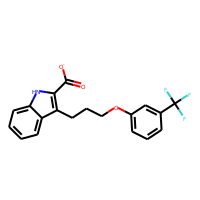
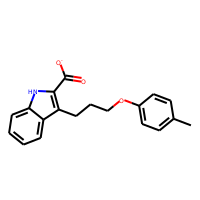
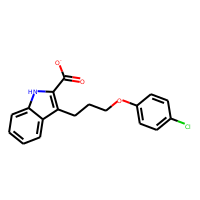
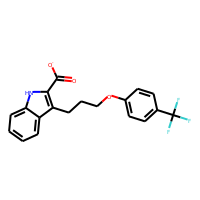
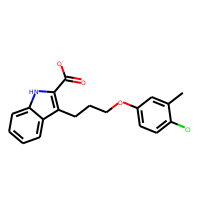
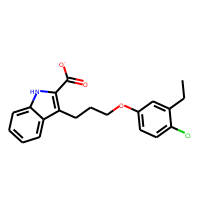
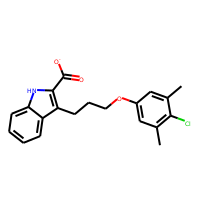
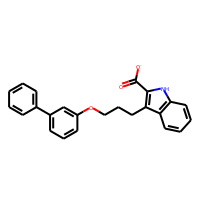
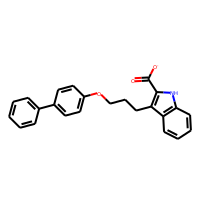

In [10]:
mcl1_ligands = ligands.LigandSet('mcl1_sample')
HTML(mcl1_ligands.get_html())

The `Ligand` classes can be accessed from the `LigandSet` by their name. Each `Ligand` has information about experimental data, references, SMILES string and SDF file path of the docked structure. Additionally, there are functions to derive and process the primary data, which is then added to the `pandas.Series` as a new entry.

In [11]:
lig_30 = mcl1_ligands['lig_30']
lig_27 = mcl1_ligands.get_ligand('lig_27')

# The `EdgeSet` and `Edge` class
The `EdgeSet` contains a `dict` of `Edge`s which are availabe for one target. It is accessible via `Target.get_edge_set()`, but can also be initialized directly.

In [12]:
from plbenchmark import edges

,0,1,Mol1,Mol2,Smiles1,Smiles2,exp. DeltaG [kcal/mol],exp. Error [kcal/mol]
0,30,27,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])[H])[H])[H])[H])[H] dtype: object,[H]c1c(c(c(c(c1[H])[H])OC([H])([H])C([H])([H])C([H])([H])C2=C(N(c3c2c(c(c(c3[H])[H])[H])[H])[H])C(=O)[O-])[H])[H] dtype: object,1.73 kilocalorie / mole,0.22 kilocalorie / mole
1,33,27,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])[H])Cl)[H])[H])[H])[H] dtype: object,[H]c1c(c(c(c(c1[H])[H])OC([H])([H])C([H])([H])C([H])([H])C2=C(N(c3c2c(c(c(c3[H])[H])[H])[H])[H])C(=O)[O-])[H])[H] dtype: object,0.76 kilocalorie / mole,0.22 kilocalorie / mole
2,39,32,dtype: object,dtype: object,[H]c1c(c(c(c(c1[H])[H])c2c(c(c(c(c2[H])[H])OC([H])([H])C([H])([H])C([H])([H])C3=C(N(c4c3c(c(c(c4[H])[H])[H])[H])[H])C(=O)[O-])[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])[H])C([H])([H])[H])[H])[H])[H])[H] dtype: object,0.45 kilocalorie / mole,0.13 kilocalorie / mole
3,35,37,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)C([H])([H])[H])[H])[H])[H] dtype: object,-0.14 kilocalorie / mole,0.37 kilocalorie / mole
4,28,35,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3C([H])([H])[H])[H])[H])[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,-2.19 kilocalorie / mole,0.22 kilocalorie / mole
5,35,33,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])[H])Cl)[H])[H])[H])[H] dtype: object,1.93 kilocalorie / mole,0.28 kilocalorie / mole
6,31,35,dtype: object,dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C(F)(F)F)[H])[H])[H])[H])[H] dtype: object,[H]c1c(c(c2c(c1[H])C(=C(N2[H])C(=O)[O-])C([H])([H])C([H])([H])C([H])([H])Oc3c(c(c(c(c3[H])C([H])([H])[H])Cl)[H])[H])[H])[H] dtype: object,-0.89 kilocalorie / mole,0.22 kilocalorie / mole

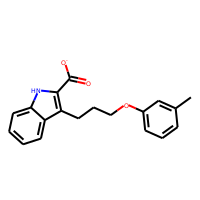
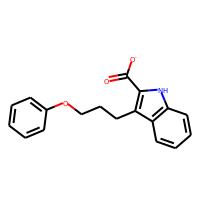
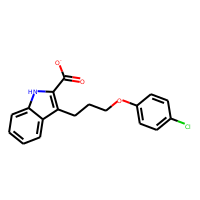
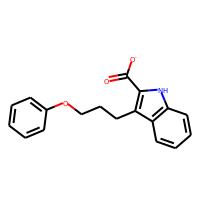
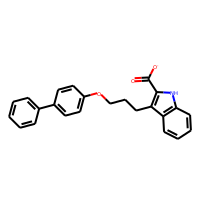
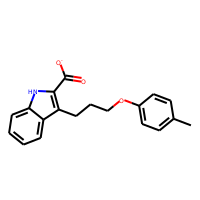
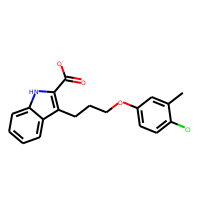
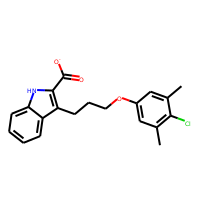
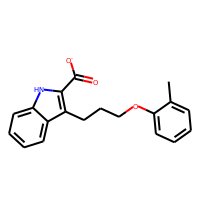
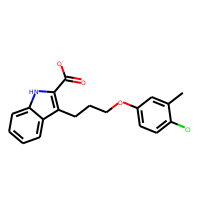
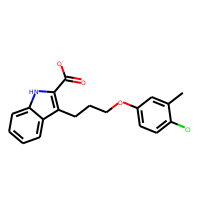
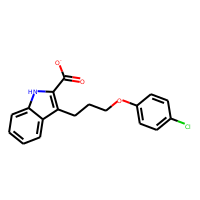
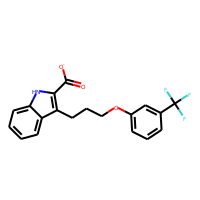
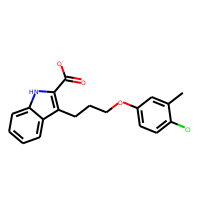

In [13]:
mcl1_edges = edges.EdgeSet('mcl1_sample')
HTML(mcl1_edges.get_html())

In [14]:
mcl1_edges.keys()

dict_keys(['edge_30_27', 'edge_33_27', 'edge_39_32', 'edge_35_37', 'edge_28_35', 'edge_35_33', 'edge_31_35'])

The `Edge` classes can be accessed from the `EdgeSet` by their name. They are lightweight and provide only access to a `pandas.DataFrame` and a `Dict`:

In [15]:
edge_30_27 = mcl1_edges.get_edge('edge_30_27')
df = edge_30_27.get_dataframe()
edge_30_27.get_dict()

{'edge_30_27': ['lig_30', 'lig_27']}